Support Vector Machines - относится к методам бинарной классификации

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from scipy import stats
import seaborn as sns

sns.set()

In [4]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50,
                  centers=2,
                  cluster_std=0.60,
                  random_state=0)


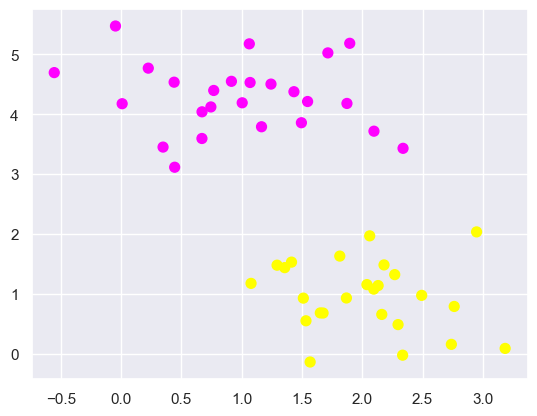

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')

(-1.0, 3.5)

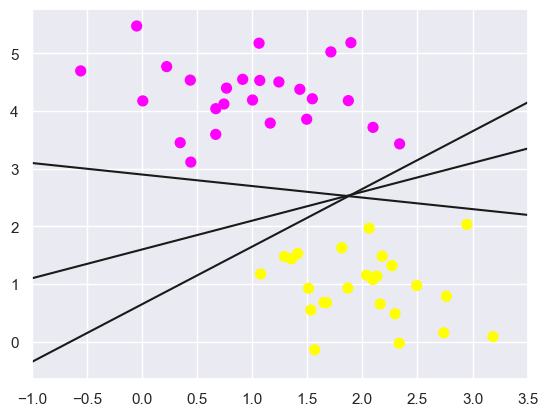

In [9]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5)

In [13]:
from sklearn.svm import SVC # Classifier

clf = SVC(kernel='linear') # Разделяющая поверхность линейной формы
clf.fit(X, y)

SVC(kernel='linear')

In [21]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca() # get current axes
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)

    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    
    # create a decision function
    P = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
              levels=[-1, 0, 1],
              alpha=0.5,
              linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                  model.support_vectors_[:, 1],
                  s=200,
                  linewidth=0.75,
                  facecolors='none',
                  edgecolors='black')
        ax.set_xlim(xlim)
        ax.set_ylim(ylim)

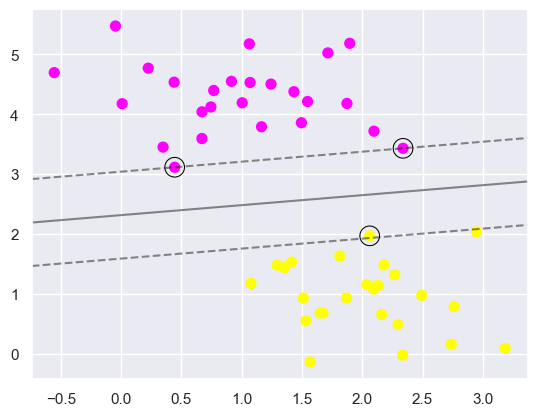

In [22]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
plot_svc_decision_function(clf)

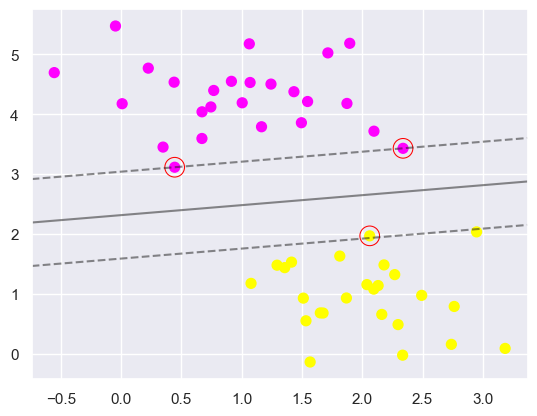

In [23]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
plot_svc_decision_function(clf, plot_support=False)
plt.scatter(clf.support_vectors_[:, 0],
           clf.support_vectors_[:, 1],
           s=200, linewidth=0.75,
           facecolors='none', edgecolors='red')

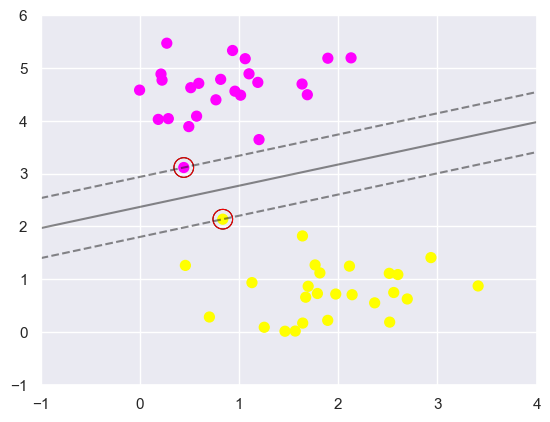

interactive(children=(Dropdown(description='N', options=(50, 100, 150, 200), value=50), FloatSlider(value=5.05…

<function __main__.plot_svm(N, svc_C)>

In [32]:
from ipywidgets import interact

def plot_svm(N, svc_C):
    X, y = make_blobs(n_samples=200,
                  centers=2,
                  cluster_std=0.60,
                  random_state=0)
    X = X[:N]
    y = y[:N]
    clf = SVC(kernel='linear', C=svc_C)
    clf.fit(X, y)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
    plt.xlim(-1, 4)
    plt.ylim(-1, 6)
    plot_svc_decision_function(clf, plt.gca())
    plt.scatter(clf.support_vectors_[:, 0],
               clf.support_vectors_[:, 1],
               s=200, linewidth=0.75,
               facecolors='none', edgecolors='red')

interact(plot_svm, N=[50, 100, 150, 200], svc_C=(0.1, 10))

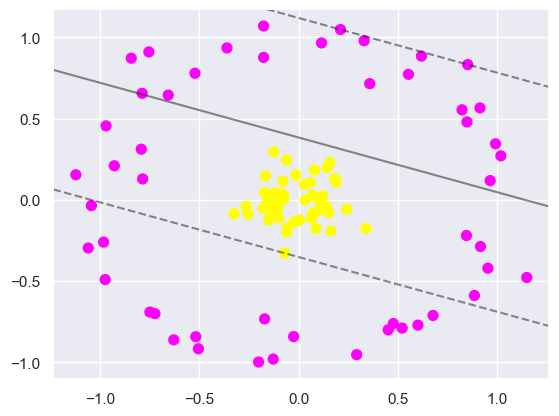

In [33]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
plot_svc_decision_function(clf, plot_support=False)

In [34]:
r = np.exp(-(X[:, 0]**2 + X[:, 1]**2))

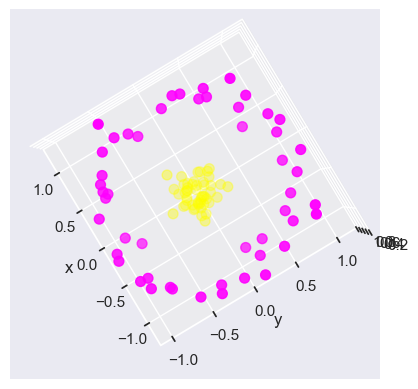

interactive(children=(Dropdown(description='elev', options=(-90, -45, 45, 90), value=-90), IntSlider(value=30,…

<function __main__.plot_3D(elev=30, azim=30)>

In [37]:
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30):
    ax=plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='spring')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, -45, 45, 90], azim=(-180, 180))

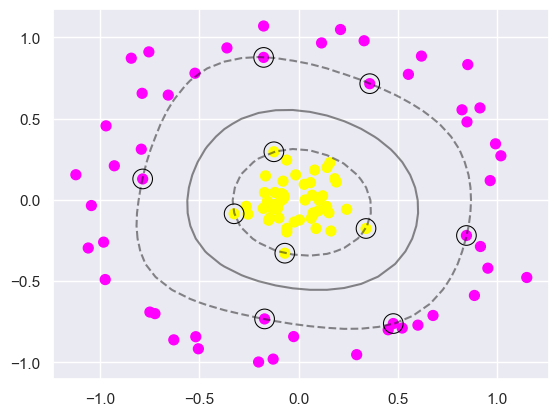

In [40]:
clf = SVC(kernel='rbf', C = 10)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
plot_svc_decision_function(clf)